In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

module_path = os.path.abspath(os.path.join("../"))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import torch
from dacite import from_dict

from dqn.buffer import ReplayBuffer
from dqn.hiv_patient import HIVPatient
from dqn.q_agent import Agent
from dqn.q_learning import Qlearner, QLearningCongfig

plt.style.use("ggplot")

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
conf_dict = {
    "gamma": 0.98,
    "batch_size": 512,
    "epsilon": {"start": 0.90, "end": 0, "decay": 200},
    "learning_rate": 0.0001,
    "num_episodes": 25,
    "steps_per_episode": 80,
    "warm_start": {"episodes": 10, "steps_per_episode": 100},
    "target_update_rate": 1000,
}

patient = HIVPatient()
conf = from_dict(data_class=QLearningCongfig, data=conf_dict)
agent = Agent(patient=patient, replay_buffer=memory)

NameError: name 'memory' is not defined

In [ ]:
memory = ReplayBuffer(6000)

memory.populate(
    patient=patient,
    num_episodes=20,
    steps_per_episode=100,
)

In [25]:
q_learner = Qlearner(
    memory=memory,
    conf=conf,
    patient=patient,
    agent=agent,
    device=DEVICE,
)
print(len(q_learner.memory))

4436


In [26]:
rewards, losses = q_learner.train()

100%|████████████████████████████████████████████████████| 80/80 [00:04<00:00, 16.16batch/s]
2022-03-22 14:26:41.667 | INFO     | dqn.q_learning:train:159 - episode = 0,  reward = 1775864.3996219947, average loss = 46707.99721679687
100%|████████████████████████████████████████████████████| 80/80 [00:04<00:00, 16.22batch/s]
2022-03-22 14:26:46.603 | INFO     | dqn.q_learning:train:159 - episode = 1,  reward = 1801247.7328557153, average loss = 46056.864990234375
100%|████████████████████████████████████████████████████| 80/80 [00:04<00:00, 16.46batch/s]
2022-03-22 14:26:51.470 | INFO     | dqn.q_learning:train:159 - episode = 2,  reward = 1831328.461084152, average loss = 46323.5857421875
100%|████████████████████████████████████████████████████| 80/80 [00:04<00:00, 16.98batch/s]
2022-03-22 14:26:56.184 | INFO     | dqn.q_learning:train:159 - episode = 3,  reward = 1633962.8708207235, average loss = 45938.25380859375
100%|████████████████████████████████████████████████████| 80/80 [00:

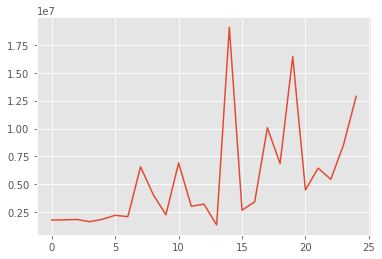

In [27]:
plt.plot(rewards)

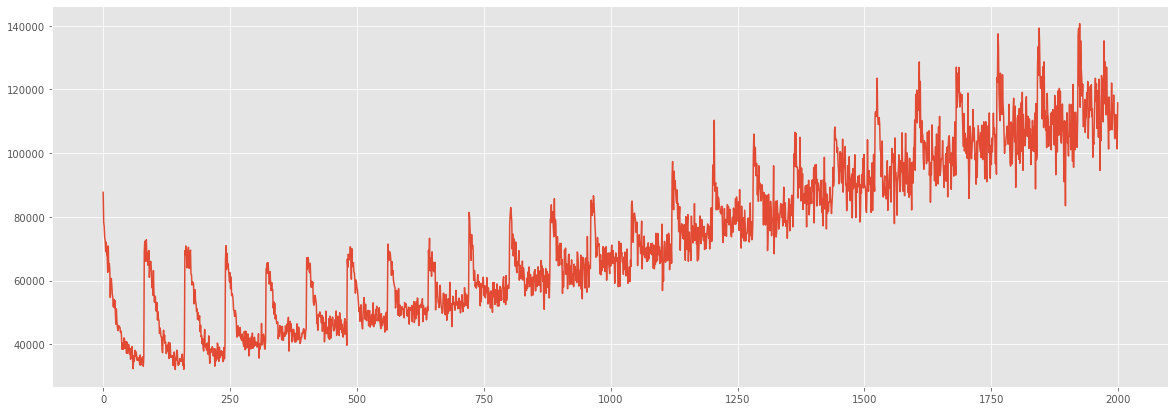

In [29]:
plt.figure(figsize=(20, 7))
plt.plot(losses)
plt.show()